In [ ]:
%load_ext autoreload
%autoreload 2 --print

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pc_networks.tc import PurkinjeCellTC, TCParameters

In [27]:
# Set up simulation parameters
t_start = 0  # ms
t_end = 350    # ms
dt = 0.01      # ms
t = np.arange(t_start, t_end, dt)
n_steps = len(t)

In [45]:
def create_spike_train(n_spikes, t_start, t_end, length=1):
    spike_train = np.zeros(n_steps)
    spike_times = np.random.uniform(t_start, t_end, n_spikes)
    for spike_time in spike_times:
        spike_idx = int(spike_time / dt)
        spike_train[spike_idx:spike_idx+int(length/dt)] = 1
    return spike_train

Reloading 'pc_networks.tc'.


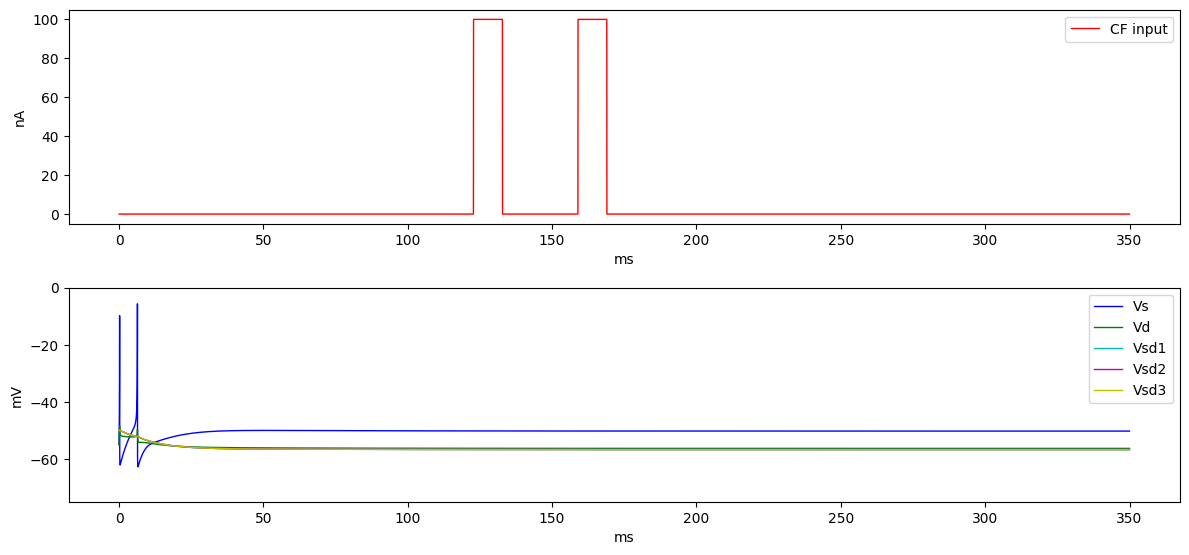

In [78]:
# Create model instance
model = PurkinjeCellTC()

# Initialize arrays to store results
Vs = np.zeros(n_steps)
VM0 = np.zeros(n_steps)
VS1 = np.zeros(n_steps)
VS2 = np.zeros(n_steps)
VS3 = np.zeros(n_steps)
freq = np.zeros(n_steps)

# Create spike train starting at 100 ms, with 3 10ms spikes with 50ms interval
Ic = create_spike_train(3, 100, 200, length=10) * 100.0

# Run simulation
# CF input at t=0
for i, time in enumerate(t):
    # Store voltage
    Vs[i] = model.Vs
    VM0[i] = model.Vd
    VS1[i] = model.Vsd[0]
    VS2[i] = model.Vsd[1]
    VS3[i] = model.Vsd[2]
    
    # Apply input 
    model.update(dt, time)
plt.figure(figsize=(12, 8))

# Plot input current
plt.subplot(3, 1, 1)
plt.plot(t, Ic, 'r-', label='CF input', linewidth=1)
plt.xlabel('ms')
plt.ylabel('nA')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, Vs, 'b-', linewidth=1, label='Vs')
plt.plot(t, VM0, 'g-', linewidth=1, label='Vd')
plt.plot(t, VS1, 'c-', linewidth=1, label='Vsd1')
plt.plot(t, VS2, 'm-', linewidth=1, label='Vsd2')
plt.plot(t, VS3, 'y-', linewidth=1, label='Vsd3')
plt.ylim(-75, 0)
plt.xlabel('ms')
plt.ylabel('mV')
plt.legend()

plt.tight_layout()
plt.show()